# Pirple Homework #3
---

**Details:**
 

1. Import pyspark into your notebook and create a new appName as “Homework 3"

2. Following the examples in the previous lectures, create a simulation of the following conditions:

    Rather than a single 2-sided coin, there are two 6-sided dice.
    When the dice are rolled, their outcomes should be added together.
    The dice should be rolled 100 times
3. Once the simulation is complete, collect the resulting outcomes and present them in a table within your notebook.

4. Display the table data as a histogram. The x-axis should be the possible outcomes (2,3,4 etc), and the y-axis should represent the total number of times that outcome appeared in the simulation.

5. Follow the "Turning it In" instructions below carefully.

In [1]:
# import libraries
import pandas as pd
import pyspark as ps
from pyspark.sql import SparkSession
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# create spark session
spark = SparkSession.builder.\
    appName('Homework3').getOrCreate()

# create spark context object
sc = spark.sparkContext

In [29]:
# check spark session
spark

Roll Dice

---

In [80]:
# number of tirals
n_trials = 100

# create a dice
def roll_dice():
    return random.randrange(1, 6)

# dice rolls
roll = sc.parallelize(range(n_trials)).\
    map(lambda _: roll_dice())

# sum all values
roll_sum = roll.sum()

# all outcome of experiments
roll_outcomes = roll.collect()

In [81]:
print(f'The total sum of all dice roll is {roll_sum}.')

The total sum of all dice roll is 307.


Table View

---

In [125]:
# create table
dice_table = pd.DataFrame()
dice_table['n_trials'] = np.arange(1, 101)
dice_table['dice_outcomes'] = roll_outcomes
dice_table = dice_table.set_index('n_trials')

In [126]:
dice_table.head()

,dice_outcomes
n_trials,
1,3
2,4
3,4
4,3
5,5


Outcome Histogram

---

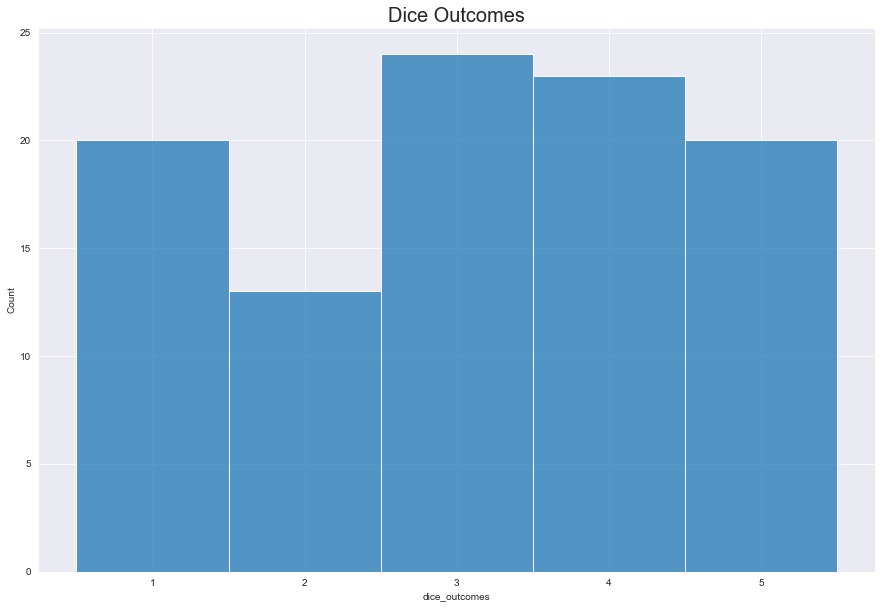

In [127]:
f, ax = plt.subplots(figsize=(15,10))
sns.set_style('darkgrid')
dice_plot = sns.histplot(
    dice_table, x='dice_outcomes', stat='count', discrete=True);

dice_plot.set_title('Dice Outcomes', fontsize=20);